<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
import html as ihtml

def text_cleaner(text):
    """Clean up the html tags from text
       Found here: https://www.kaggle.com/ceshine/remove-html-tags-using-beautifulsoup
    """
    text = BeautifulSoup(ihtml.unescape(text)).text
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\\n", " ", text)  # Get rid of '\n'
    text = text[1:] # Strip the 'b' at the beginning of each entry
    return text

In [3]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
df = pd.read_csv("data/job_listings.csv")
df = df.drop(["Unnamed: 0"], axis=1)
#print(df.columns)

df.head()

#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
df['description'] = df['description'].apply(text_cleaner)

In [5]:
df.head(10)

,description,title
0,"""Job Requirements: Conceptual understanding in...",Data scientist
1,"'Job Description As a Data Scientist 1, you w...",Data Scientist I
2,'As a Data Scientist you will be working on co...,Data Scientist - Entry Level
3,"'$4,969 - $6,756 a monthContractUnder the gene...",Data Scientist
4,'Location: USA \xe2\x80\x93 multiple locations...,Data Scientist
5,'Create various Business Intelligence Analytic...,Data Scientist
6,'As Spotify Premium swells to over 96M subscri...,Associate Data Scientist – Premium Analytics
7,"""Everytown for Gun Safety, the nation's larges...",Data Scientist
8,"""MS in a quantitative discipline such as Stati...",Sr. Data Scientist
9,'Slack is hiring experienced data scientists t...,"Data Scientist, Lifecyle"


## 2) Use Spacy to tokenize the listings 

In [9]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [11]:
##### Your Code Here #####
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [12]:
df.head()

,description,title,tokens
0,"""Job Requirements: Conceptual understanding in...",Data scientist,"[""job, requirements:, conceptual, understandin..."
1,"'Job Description As a Data Scientist 1, you w...",Data Scientist I,"['job, description, , data, scientist, 1,, he..."
2,'As a Data Scientist you will be working on co...,Data Scientist - Entry Level,"['as, data, scientist, working, consulting, bu..."
3,"'$4,969 - $6,756 a monthContractUnder the gene...",Data Scientist,"['$4,969, $6,756, monthcontractunder, general,..."
4,'Location: USA \xe2\x80\x93 multiple locations...,Data Scientist,"['location:, usa, \xe2\x80\x93, multiple, loca..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####
from sklearn.feature_extraction.text import CountVectorizer


In [20]:
docs = []
for i in range(len(tokens)):
    new_string = ''
    for j in range(len(tokens[i])):
        new_string += (tokens[i][j] + " ")
    docs.append(new_string)

docs[:2]

['"job requirements: conceptual understanding machine learning models like nai\\xc2\\xa8ve bayes, k-means, svm, apriori, linear/ logistic regression, neural, random forests, decision trees, k-nn hands-on experience 2 intermediate expert level coding skills python/r. (ability write functions, clean efficient data manipulation mandatory role) exposure packages like numpy, scipy, pandas, matplotlib etc python ggplot2, dplyr, tidyr r ability communicate model findings technical non-technical stake holders hands experience sql/hive similar programming language past work github, kaggle published article master\'s degree statistics/mathematics/computer science quant specific field. apply now" ',
 '\'job description   data scientist 1, help build machine learning models, data pipelines, micro-services help clients navigate healthcare journey. empowering improving generation accolade applications user experiences. day life\\xe2\\x80\\xa6 work small agile team design develop mobile applications 

In [21]:
#tokens[0]

In [26]:
vect = CountVectorizer(stop_words='english')

vect.fit(docs)

dtm = vect.transform(docs)

In [27]:
dtm_df = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [28]:
dtm_df.head()

,00,000,02115,03,0305,0356,04,062,06366,10,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
doc_len = [len(doc) for doc in docs]

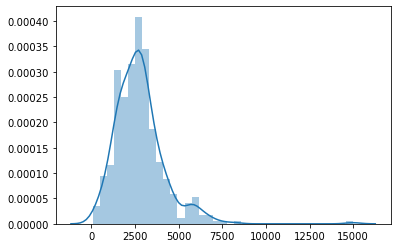

In [30]:
import seaborn as sns

sns.distplot(doc_len);

## 4) Visualize the most common word counts

In [31]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [34]:
##### Your Code Here #####
from collections import Counter

wc = count(df['tokens'])


wc
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
78,data,420,3903,1.0,0.028813,0.028813,0.985915
190,,361,2212,2.0,0.016329,0.045142,0.847418
37,experience,401,1667,3.0,0.012306,0.057448,0.941315
19,work,350,1063,4.0,0.007847,0.065295,0.821596
344,business,303,1051,5.0,0.007759,0.073054,0.711268
...,...,...,...,...,...,...,...
15489,domestic/regional,1,1,15490.0,0.000007,0.999970,0.002347
15473,receive.,1,1,15491.0,0.000007,0.999978,0.002347
15472,licensed,1,1,15492.0,0.000007,0.999985,0.002347
15464,"25,000",1,1,15493.0,0.000007,0.999993,0.002347


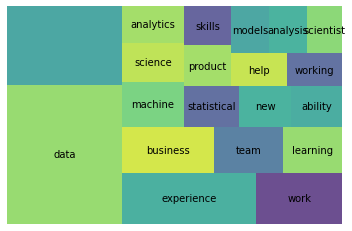

In [36]:
import squarify

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
##### Your Code Here #####
tfidf = TfidfVectorizer(stop_words='english')

dtm = tfidf.fit_transform(docs)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

,00,000,02115,03,0305,0356,04,062,06366,10,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.10622,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [41]:
tfidf = TfidfVectorizer(stop_words='english', 
                        tokenizer=tokenize, 
                        min_df=2,
                        max_df=.95,
                        max_features=5000,
                        ngram_range=(1,2)
                       )

dtm = tfidf.fit_transform(docs)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,,,2,3,4,5,ability,addition,additional,advanced,...,you\xe2\x80\x99ll,you\xe2\x80\x99ll develop,you\xe2\x80\x99ll need,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99ve,yrs,zf,|,||
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.080297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.037171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.066231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [42]:
from sklearn.neighbors import NearestNeighbors

In [43]:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [44]:
##### Your Code Here #####
words_for_job = [""" A friendly, engaging environment where problem-solving is a focus. 
We develop community where home-life and  health are not lost.
Able to work from home often."""]

#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [45]:
new = tfidf.transform(words_for_job)

In [46]:
new

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [47]:
nn.kneighbors(new.todense())

(array([[1.26695604, 1.27943376, 1.30683522, 1.31271942, 1.31346773]]),
 array([[244, 200,  82, 379, 299]], dtype=int64))

In [49]:
docs[244]

"'zeus flawless stays.   founded november 2015 based san francisco, california, zeus shaking $18b corporate housing industry unique strategy leasing unfurnished, privately-owned homes converting expertly appointed, full-service corporate housing units today\\xe2\\x80\\x99s global professional. we\\'re passionate delivering world-class customer service trusted provider corporate housing earth. 700+ homes spanning san francisco bay area, los angeles, washington d.c., seattle (more cities coming soon), way realizing vision. zeus raised $24m financing initialized capital, google ventures, bowery capital, floodgate. zeus founders previous exits worked real estate technology 10 years.   role   building models inform decisions property acquisition, pricing, operations company. build price prediction models house rentals build cost prediction models home operations build data products website (e.g. recommended homes) collaborate acquisitions, leasing, engineering teams integrate model outputs 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 